In [1]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리 설정
import os
os.chdir('/content/drive/MyDrive/PyStat')

Mounted at /content/drive


In [2]:
# 객체 내용/타입 출력
def printobj(*a):
    for x in a:
        display(x)
        print('\n', type(x), '\n')

# 개요

## CHAP 1. 데이터

- 통계분석

- '데이터'

- 데이터 분류

- ch1_sport_test.csv

- pandas

In [3]:
# pandas를 pd라는 이름으로 임포트
import pandas as pd

- read_csv()

- DataFrame으로

In [4]:
# 작업 디렉토리 아래 data 폴더에 있는 csv 파일을 읽어 들여 DataFrame 자료구조로 저장한다.
df = pd.read_csv('data/ch1_sport_test.csv', index_col='학생번호')
printobj(df)  # df의 내용과 타입 출력

,학년,이름,체온,악력,윗몸일으키기,점수,순위
학생번호,,,,,,,
1,1,신민준,36.3,40.2,34,15,4
2,1,박건호,36.9,34.2,14,7,10
3,1,이동훈,37.1,28.8,27,11,7
4,2,강동윤,36.0,39.0,27,14,5
5,2,박정환,37.5,50.9,32,17,2
6,2,김지석,36.4,36.5,20,9,9
7,3,김명훈,36.5,36.6,31,13,6
8,3,신진서,37.3,49.2,37,18,1
9,3,원성진,36.1,26.0,28,10,8



 <class 'pandas.core.frame.DataFrame'> 



- 체력 테스트 결과

- '체온' 열

In [5]:
# DataFrame 인덱싱으로 하나의 열을 추출하면 Series라는 자료구조로 저장된다.
sr = df['체온']
printobj(sr)  # sr의 내용과 타입 출력

학생번호
1     36.3
2     36.9
3     37.1
4     36.0
5     37.5
6     36.4
7     36.5
8     37.3
9     36.1
10    36.8
Name: 체온, dtype: float64


 <class 'pandas.core.series.Series'> 



- Series

### 1-1. 데이터의 크기

- 제일 먼저 확인

In [6]:
# 데이터 전체의 크기를 확인할 수 있다.
df.shape

(10, 7)

- 숫자 2개

- 변수

- 학생번호

DataFrame의 shape 정리

< DataFrame.shape >
- (m , n)
- 테이블(행렬)형 데이터의 행(row) 크기가 m, 열(column) 크기가 n
- 데이터프레임 내의 **관측(observation) 수가 m**, **변수(variable) 개수가 n**

<details>
<summary>참고</summary>

테이블(행렬)형 데이터는 엄밀히 말해 2차원이 아니다.
- (m, n)은 주어진 두 축(axis) 방향으로
  - 배열(array)의 차원(dimension)이 각각 m 차원, n 차원 임을 의미한다.
- 배열의 차원의 수 또는 축의 수(number of array dimensions / axes)가
  - '2'라고 해야 올바른 표현이다.
- 즉, 테이블형 데이터는 2차 텐서(tensor of second order) 이다.
- Pandas/NumPy 객체의 ndim 속성으로 확인 가능 : df.ndim == 2
</details>

- 1변수

- 체온 shape

In [7]:
sr.shape

(10,)

Series의 shape 정리

< Series.shape >
- (m,)
- 배열(벡터)형 데이터의 크기가 m
- **변수 하나**에 **관측 수가 m**

### 1-2. 데이터의 종류

- 다양한 분류

#### 1) 질적 변수와 양적 변수

- 크게 두 가지

**질적 변수**(qualitative variable)
- 선택 : 설문조사 만족도

> 1. 매우 좋음
> 2. 좋음
> 3. 보통
> 4. 나쁨
> 5. 매우 나쁨

- 구별 : 혈액형 조사

> - A 형
> - B 형
> - O 형
> - AB 형

- **범주형 변수**(categorical variable)

- **2진변수**(binary variable)

- **양적 변수**(quantitative variable)

- **수치형 변수**(numerical variable)

- 주의할 점

#### 2) 척도 수준

- 측정 척도(measurement scale)/수준(level of measurement)

- 질적 변수
  - **명목 척도**(norminal scale)
  - **순서 척도**(ordinal scale)

- 양적 변수
  - **간격 척도**(interval scale)
  - **비율 척도**(ratio scale)

- **척도 수준**(level of measurement scale)

##### <u>명목 척도</u>

- 단순한 분류

- 구별 : 동일성 여부

- 학생번호 4와 8

##### <u>순서 척도</u>

- 순서/대소 관계

- 성적 순위
  - 차이/비율 무의미

##### <u>간격 척도</u>

- 차이

- 온도
  - 비율 무의미

##### <u>비율 척도</u>

- 대소, 차이, 비

- 길이

- 간격 척도 vs 비율 척도
  - 절대 영(absolute zero)

즉,
- '0'의 의미가 '없음'을 나타내는지 여부를 판단하면 된다.
- 길이에서 0㎝는 길이가 없음을 나타내지만( $∴$ 비율 척도),
- 온도에서 0℃는 온도가 없다는 뜻이 아니다( $∴$ 간격 척도).

- 정리

<br>

[표 1-1] 척도 수준

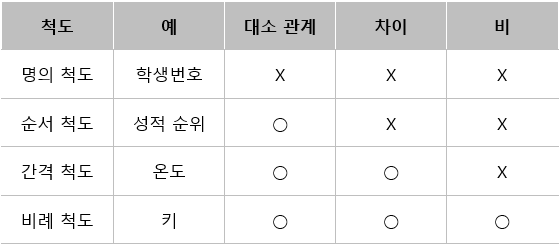

#### 3) 이산형 변수와 연속형 변수

- 다른 두 가지

- **이산형 변수**(discrete variable)

- 예를 들면

- **연속형 변수**(continuous variable)

- 길이, 무게 등

- 측정 정밀도 한계

- 예를 들어

#### 4) 요약

- 끝으로 두 가지

> 비정형 데이터(unstructured data)
> - 변수화 불가능 → 통계분석/데이터애널리틱스(data analytics) 대상 아님
>
> 정형 데이터(structured data)
> - 변수화 가능 → 통계분석/데이터애널리틱스 대상

- 정형 데이터 요약

##### 정형 데이터(변수)의 분류

- 변수 속성에 따른 분류
  - 질적/범주형(qualitative/categorical) : 설문조사 만족도, 혈액형, 성별, 흡연 여부
  - 양적/수치형(quantitative/numerical) : 시험 점수, 키, 몸무게, 온도

- 값의 속성에 따른 분류
  - 이산형(discrete) : 주사위의 눈, 학생 수
  - 연속형(continuous) : 길이, 질량, 시간

- 측정 수준(level of measurement)에 따른 분류
  - 측정하는 네 가지 척도(scale)로 분류
    - 명목 척도(nominal scale)
    - 순서 척도(ordinal scale)
    - 간격 척도(interval scale)
    - 비율 척도(ratio scale)
  - 명목 ⊃ 순서 ⊃ 간격 ⊃ 비율
    - 명목 척도 := **구분** 개념
    - 순서 척도 := 명목 척도 + **순서** 개념
    - 간격 척도 := 순서 척도 + **간격** 개념
    - 비율 척도 := 간격 척도 + **비율** 개념(**절대 영**)

|Offers:|Nominal|Ordinal|Interval|Ratio|
|:------|:-----:|:-----:|:------:|:---:|
|The sequence of variables is established|-|○|○|○|
|Mode|○|○|○|○|
|Median|-|○|○|○|
|Mean|-|-|○|○|
|Difference between variables can be evaluated|-|-|○|○|
|Addition and subtraction of variables|-|-|○|○|
|Multiplication and division of variables|-|-|-|○|
|Absolute zero|-|-|-|○|

<br>

  - 이에 따라, 질적/범주형, 양적/수치형 정형 데이터(변수) 분류
    - 질적/범주형
      - 명목 척도(nominal scale)로 측정되는 것 : 혈액형, 성별, 흡연 여부
      - 순서 척도(ordinal scale)로 측정되는 것 : 설문조사 만족도
    - 양적/수치형
      - 간격 척도(interval scale)로 측정되는 것 : 시험 점수, 온도
      - 비율 척도(ratio scale)로 측정되는 것 : 키, 몸무게

### 1-3. 체력 테스트 예제

- 분류 방법 적용

In [8]:
# 주어진 데이터에 대해 검토해 보자.
df

,학년,이름,체온,악력,윗몸일으키기,점수,순위
학생번호,,,,,,,
1,1,신민준,36.3,40.2,34,15,4
2,1,박건호,36.9,34.2,14,7,10
3,1,이동훈,37.1,28.8,27,11,7
4,2,강동윤,36.0,39.0,27,14,5
5,2,박정환,37.5,50.9,32,17,2
6,2,김지석,36.4,36.5,20,9,9
7,3,김명훈,36.5,36.6,31,13,6
8,3,신진서,37.3,49.2,37,18,1
9,3,원성진,36.1,26.0,28,10,8


- 학생번호

- 학년

- 이름

- 체온

- 악력

- 윗몸일으키기

- 점수는
  - 간격? 비율?
  - 이산형? 연속형?

- 순위는

정리하면 다음과 같다.
- 학생번호 : 명목/이산
- 학년 : 간격/이산
- 이름 : 명목/이산
- 체온 : 간격/연속
- 악력 : 비율/연속
- 윗몸일으키기 : 비율/이산
- 점수 : 간격(비율? 0점의 의미?)/이산(연속? 정밀도 문제?)
- 순위 : 순서/이산

- 데이터의 크기와 변수의 분류

### 1-4. 통계의 종류
- 기술 통계(descriptive statistics) : 수집한 데이터를 요약, 묘사, 설명하는 통계 기법
- 추론 통계(inferential statistics) : 수집한 데이터를 바탕으로 추론, 예측하는 통계 기법